# ISAT 449: Emerging Topics in Applied Data Science

## Author: Blake Jones

### Mini-Project: How to Make a Speech Emotion Recognizer Using Python And Scikit-learn

#### Speech Emotion Recognition – Objective
To build a model to recognize emotion from speech using the librosa and sklearn libraries and the RAVDESS dataset.

#### Speech Emotion Recognition – About the Python Mini Project
In this Python mini project, we will use the libraries librosa, soundfile, and scikit-learn (among others) to build a model using an MLPClassifier. Our model will able to recognizeemotion from sound files. We will load the data, extract features from it, then split the dataset into training and testing sets. Then, we’ll initialize an MLPClassifier and train the model. Finally, after we are satisfied with the accuracy of our model, we will test the model on a sound file generated by our voice!

#### The Dataset
For this Python mini project, we’ll use the RAVDESS dataset; this is the Ryerson Audio-Visual Database of Emotional Speech and Song dataset, and is free to download. This dataset has 7356 files rated by 247 individuals 10 times on emotional validity, intensity, and genuineness. The entire dataset is 24.8GB from 24 actors, but we’ve lowered the sample rate on allthe files, and you can download from Canvas.

#### File Summary
In total, the RAVDESS collection includes 7356 files (2880+2024+1440+1012 files).

#### File naming convention
Each of the 7356 RAVDESS files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 02-01-06-01-02-01-12.mp4). These identifiers define the stimulus characteristics:
#### Filename identifiers
* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

<i>Filename example: 02-01-06-01-02-01-12.mp4</i>

* Video-only (02)
* Speech (01)
* Fearful (06)
* Normal intensity (01)
* Statement "dogs" (02)
* 1st Repetition (01)
* 12th Actor (12)
* Female, as the actor ID number is even.

You can find more information on the file structure and filenames from Zenodo: Filename References (https://zenodo.org/record/1188976#.X3KzGGhKhPa)

### Let's import the dependencies
<h4><b>1. import files</b></h4>

In [1]:
import soundfile # to read audio file
import numpy as np
import matplotlib.pyplot as plt
import librosa # to extract speech features
import glob
import os
import pickle# to save model after training
from sklearn.model_selection import train_test_split# for splitting training and testing
from sklearn.neural_network import MLPClassifier# multi-layer perceptron model
from sklearn.metrics import accuracy_score# to measure how good we are

<h4><b>2. Define a function extract_feature to extract the mfcc, chroma, and mel features from a sound file. This function takes 4 parameters- the file name and three Boolean parameters for the three features: </b></h4>

* **mfcc**: Mel Frequency Cepstral Coefficient, represents the short-term power spectrum of a sound
* **chroma**: Pertains to the 12 different pitch classes
* **mel**: Mel Spectrogram Frequency

Open the sound file with soundfile.SoundFile using with-as so it’s automatically closed once we’re done. Read from it and call it X. Also, get the sample rate. If chroma is True, get theShort-Time Fourier Transform of X.

Let result be an empty numpy array. Now, for each feature of the three, if it exists, make a call to the corresponding function from librosa.feature (eg- librosa.feature.mfcc for mfcc), andget the mean value. Call the function hstack() from numpy with result and the feature value, and store this in result. hstack() stacks arrays in sequence horizontally (in a columnarfashion). Then, return the result.

In [2]:
# Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X=sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

<h4><b>3. Now, let’s define a dictionary to hold numbers and the emotions available in the RAVDESS dataset, and a list to hold those we want to use in our model- calm, happy, fearful, disgust, and surprised.</b></h4>

In [3]:
# Emotions in the RAVDESS dataset
emotions={'01':'neutral',
          '02':'calm',
          '03':'happy',
          '04':'sad',
          '05':'angry',
          '06':'fearful',
          '07':'disgust',
          '08':'surprised'
}

# Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust', 'surprised']

<h4><b>4. Now, let’s load the data with a function load_data() – this takes in the relative size of the test set as parameter. x and y are empty lists; we’ll use the glob() function from the glob module to get all the pathnames for the sound files in our dataset. The pattern we use for this is: **“ravdess-data\Actor_\.wav”**.</b></h4>

***So, for each such path, get the basename of the file, the emotion by splitting the name around ‘-’ and extracting the third value:***

In [4]:
# Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("ravdess-data\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

***Using our emotions dictionary, this number is turned into an emotion, and our function checks whether this emotion is in our list of observed_emotions; if not, it continues to the next file. It makes a call to extract_feature and stores what is returned in ‘feature’. Then, it appends the feature to x and the emotion to y. So, the list x holds the features and y holds the emotions.***

We call the function train_test_split with these, the test size, and a random state value, and return that.

<h4><b>5. Time to split the dataset into training and testing sets! Let’s keep the test set at 25% of the dataset and use the load_data function for this.</b></h4>

In [5]:
# Split the dataset
x_train,x_test,y_train,y_test= load_data(test_size=0.25)

<h4><b>6. Observe the shape of the training data and testing datasets:</h4></b>

In [6]:
# Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(720, 240)


<h4><b>7. And get the number of features extracted.</h4></b>

In [7]:
# Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


<h4><b>8. Build Neural Network with Scikit Learn MultiLayer Perceptron Classifier</b></h4>

Now, let’s initialize an MLPClassifier. This is a Multi-layer Perceptron Classifier; it optimizes the log-loss function using different optimizers (lbfgs, adam or stochastic gradient descent). Recall that the MLPClassifier has an internal neural network for the purpose of classification, and is a feed-forward ANN model.

In [8]:
ser_model = MLPClassifier(solver='adam', hidden_layer_sizes=(256, 1024, 256), batch_size='auto', learning_rate='adaptive', epsilon=1e-08, activation='logistic', tol=1.0e-8, alpha=0.0005, max_iter=2500, verbose=False, random_state=1)

<h4><b>9. Train the Model </b></h4>

In [9]:
ser_model.fit(x_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0005,
              hidden_layer_sizes=(256, 1024, 256), learning_rate='adaptive',
              max_iter=2500, random_state=1, tol=1e-08)

## Model Parameters

In [10]:
print('output activation function:', ser_model.out_activation_)

output activation function: softmax


In [11]:
print('number of layers:',ser_model.n_layers_)

number of layers: 5


In [12]:
print('number of classes', ser_model.n_outputs_)

number of classes 5


In [13]:
print('number of epochs to convergence:',ser_model.n_iter_ )

number of epochs to convergence: 2187


<h4><b>10. Plot the loss during training</b></h4>

A loss function, also known as a cost function, takes into account the probabilities or uncertainty of a prediction based on how much the prediction varies from the true value. This gives us a more nuanced view into how well the model is performing.

Unlike accuracy, loss is not a percentage — it is a summation of the errors made for each sample in training or validation sets. Loss is often used in the training process to find the
"best" parameter values for the model (e.g. weights in neural network). During the training process the goal is to minimize this value.

In [14]:
loss_values = ser_model.loss_curve_

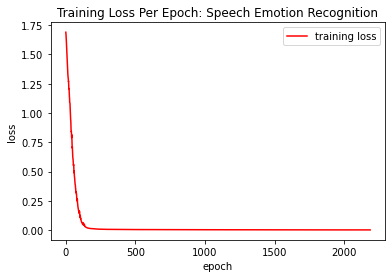

In [15]:
fig = plt.figure(figsize=(6, 4))
plt.plot(loss_values, color="red", label = 'training loss')
plt.xlabel('epoch')
plt.ylabel('loss');
#legend
plt.legend(loc='upper right')
#title
plt.title('Training Loss Per Epoch: Speech Emotion Recognition')
#show plot
plt.show()

<h4><b>11. Model Predictions</b></h4>

Let’s predict the values for the test set. This gives us y_pred (the predicted emotions for the features in the test set).

In [16]:
# Predict for the test set
y_pred = ser_model.predict(x_test)

<h4><b>12. Model Performance</b></h4>

To calculate the accuracy of our model, we’ll call up the accuracy_score() function we imported from scikit-learn. Finally, we’ll round the accuracy to 2 decimal places and print it out.

In [17]:
# Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 75.83%


In [18]:
print('test set accurracy: {0:.2f} %'.format(100*ser_model.score(x_test,y_test)))

test set accurracy: 75.83 %


### Print the classification report

In [19]:
from sklearn import metrics
print ("Classification Report:")
print (metrics.classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        calm       0.88      0.91      0.89        54
     disgust       0.77      0.70      0.73        43
     fearful       0.72      0.72      0.72        43
       happy       0.67      0.67      0.67        49
   surprised       0.74      0.76      0.75        51

    accuracy                           0.76       240
   macro avg       0.75      0.75      0.75       240
weighted avg       0.76      0.76      0.76       240



### Plot the confusion matrix

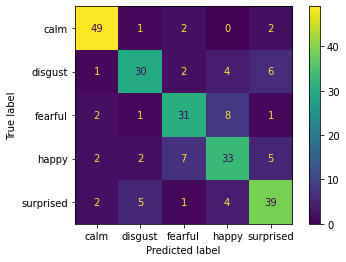

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=ser_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=ser_model.classes_)
disp.plot()
plt.show()

### Plot the confusion matrix

In [21]:
print('The predictied emotion from the speech is: {}'.format(ser_model.predict([x_test[22]])[0]))

The predictied emotion from the speech is: disgust


In [22]:
print('The true emotion is: {}'.format(y_test[22]))

The true emotion is: disgust


<h4><b>13. Pickle (serialize) and save the trained classifier to a folder</b></h4>

In [23]:
# Serialization with Python's Pickle
import pickle
import os

dest = os.path.join('classifiers', 'pkl_objects')
if not os.path.exists(dest):
    os.makedirs(dest)
    
pickle.dump(ser_model, open(os.path.join(dest, 'ser_classifier.pkl'), 'wb'), protocol=4)

<h4><b>14. Load the saved classifier into memory</b></h4>

In [24]:
# load the saved the trained classifier into memory
import pickle
import re
import os
os.chdir('classifiers')

pickled_ser_model = pickle.load(open(os.path.join('pkl_objects', 'ser_classifier.pkl'), 'rb'))

<h4><b>15. Test the re-loaded model</b></h4>

In [25]:
print('The reloaded model predicts the emotion from the speech is: {}'
      .format(pickled_ser_model.predict([x_test[33]])[0]))

The reloaded model predicts the emotion from the speech is: fearful


In [26]:
print('The true emotion is: {}'.format(y_test[33]))

The true emotion is: fearful


### Summary

In this Python Machine-Learning, Mini-Project, we built a model that learned to recognize emotions from speech. We used an MLPClassifier for the neural network and made use of the soundfile library to read the sound file. We also used the librosa library to extract features from the sound files. We serialized the model and tested the reloaded model on *unseen* data and saw that it performed well. The model delivered an accuracy of 70-80%, which is not bad for our first attempt at building a speech emotion recognizer.

<h1 style="color: orange;">Part II-Record and test my voice!</h1>

<h4><b> Let's convert my .wav test file into a feature and then predict the feature </b></h4>

In [27]:
os.chdir('..')

test_file = "Blake1.wav"
test_feature=extract_feature(test_file, mfcc=True, chroma=True, mel=True)
test_numpy = np.array(test_feature)
test_reshape = test_numpy.reshape(1,-1)


print('The reloaded model predicts the emotion from the speech is: {}'
      .format(pickled_ser_model.predict([test_reshape[0]])))


The reloaded model predicts the emotion from the speech is: ['fearful']


### Conclusion:
My model misclassified my voice as fearful. I was going for a more surprised/happy emotion. On the other hand, we trained the model on specific emotions that differ between each actor. We aren't going to iron out the model perfectly so that it is working flawlessly. I think with 5 emotions, we did fairly well.